# Acute Inflammations of the Urinary System
**SOURCE: https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations**

**Abstract:** The data was created by a medical expert as a data set to test 
the expert system, which will perform the presumptive diagnosis of two 
diseases of the urinary system.
	
Data Set Characteristics:  Multivariate<br/>
Attribute Characteristics: Categorical, Integer<br/>
Associated Tasks: Classification<br/>
Number of Instances: 120<br/>
Number of Attributes: 6<br/>
Missing Values? No<br/>
Area: Life<br/>
Date Donated: 2009-02-11<br/>

## Source:

Jacek Czerniak, Ph.D., Assistant Professor<br/>
Systems Research Institute<br/>
Polish Academy of Sciences<br/>
Laboratory of Intelligent Systems<br/>
ul. Newelska 6, Room 218<br/>
01-447 Warszawa, Poland<br/>
e-mail: jacek.czerniak@ibspan.waw.pl or jczerniak@ukw.edu.pl <br/>

## Data Set Information:

The main idea of this data set is to prepare the algorithm of the expert 
system, which will perform the presumptive diagnosis of two diseases of 
urinary system. It will be the example of diagnosing of the acute 
inflammations of urinary bladder and acute nephritises. For better 
understanding of the problem let us consider definitions of both 
diseases given by medics. Acute inflammation of urinary bladder is
characterised by sudden occurrence of pains in the abdomen region and 
the urination in form of constant urine pushing, micturition pains and 
sometimes lack of urine keeping. Temperature of the body is rising, 
however most often not above 38C. The excreted urine is turbid and 
sometimes bloody. At proper treatment, symptoms decay usually within 
several days. However, there is inclination to returns. At persons with 
acute inflammation of urinary bladder, we should expect that the illness 
will turn into protracted form.

Acute nephritis of renal pelvis origin occurs considerably more often at 
women than at men. It begins with sudden fever, which reaches, and 
sometimes exceeds 40C. The fever is accompanied by shivers and one- or 
both-side lumbar pains, which are sometimes very strong. Symptoms of 
acute inflammation of urinary bladder appear very often. Quite not 
infrequently there are nausea and vomiting and spread pains of whole 
abdomen.

The data was created by a medical expert as a data set to test the 
expert system, which will perform the presumptive diagnosis of two 
diseases of urinary system. The basis for rules detection was Rough Sets 
Theory. Each instance represents an potential patient.

The data is in an ASCII file. Attributes are separated by TAB. Each line 
of the data file starts with a digit which tells the temperature of patient.

## Attribute Example:

For example, '35,9 no no yes yes yes yes no'<br/>
Where:<br/>
'35,9' Temperature of patient<br/>
'no' Occurrence of nausea<br/>
'no' Lumbar pain<br/>
'yes' Urine pushing (continuous need for urination)<br/>
'yes' Micturition pains<br/>
'yes' Burning of urethra, itch, swelling of urethra outlet<br/>
'yes' decision: Inflammation of urinary bladder<br/>
'no' decision: Nephritis of renal pelvis origin<br/>

## Attribute Information:

a1 Temperature of patient { 35C-42C }<br/>
a2 Occurrence of nausea { yes, no }<br/>
a3 Lumbar pain { yes, no }<br/>
a4 Urine pushing (continuous need for urination) { yes, no }<br/>
a5 Micturition pains { yes, no }<br/>
a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }<br/>
d1 decision: Inflammation of urinary bladder { yes, no }<br/>
d2 decision: Nephritis of renal pelvis origin { yes, no } <br/>

## Relevant Papers:

J.Czerniak, H.Zarzycki, Application of rough sets in the presumptive 
diagnosis of urinary system diseases, Artifical Inteligence and Security 
in Computing Systems, ACS'2002 9th International Conference Proceedings, 
Kluwer Academic Publishers,2003, pp. 41-51


In [1]:
import urllib.request

def download_url(url, save_as):
    response = urllib.request.urlopen(url)
    data = response.read()
    file = open(save_as, 'wb')
    file.write(data)
    file.close()
    response.close()
    
def read_binary_file(file):
    f = open(file,'rb')
    block = f.read()
    return block.decode('utf-16')

def split_text_in_lines(text):
    return text.split('\r\n')

def split_by_tabs(line):
    return line.split('\t')

In [2]:
names_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.names'
data_link = 'https://archive.ics.uci.edu/ml/machine-learning-databases/acute/diagnosis.data'
diagnosis_names = 'diagnosis.names'
diagnosis_data = 'diagnosis.data'
download_url(names_link, diagnosis_names)
download_url(data_link, diagnosis_data)

In [3]:
import numpy as np

def parse_double(field):
    field = field.replace(',', '.')
    return float(field)

def parse_boolean(field):
    return 1. if field == 'yes' else 0.

def read_np_array(file = diagnosis_data):
    text = read_binary_file(file)
    lines = split_text_in_lines(text)
    rows = []
    for line in lines:
        if line == '': continue
        line = line.replace('\r\n', '')
        fields = split_by_tabs(line)
        row = []
        j = 0
        for field in fields:
            value = parse_double(field) if j == 0 else parse_boolean(field)
            row.append(value)
            j += 1
        rows.append(row)
    matrix = np.array(rows, dtype = np.float32)
    return matrix

def get_random_indexes(n):
    indexes = list(range(n))
    random_indexes = []
    for i in range(n):
        r = np.random.randint(len(indexes))
        random_indexes.append(indexes.pop(r))
    return random_indexes

def get_indexes_for_2_datasets(n, training = 80):
    indexes = get_random_indexes(n)
    train = int(training / 100. * n)
    return indexes[:train], indexes[train:]

matrix = read_np_array()
n_samples, n_dimensions = matrix.shape

train_indexes, test_indexes = get_indexes_for_2_datasets(n_samples)
train_data = matrix[train_indexes]
test_data = matrix[test_indexes]

def print_dataset(name, data):
    print('Dataset {}. Shape: {}'.format(name, data.shape))
    print(data)

In [4]:
print_dataset('Train', train_data)

Dataset Train. Shape: (96, 8)
[[37.   0.   0.   1.   1.   1.   1.   0. ]
 [37.5  0.   0.   1.   1.   0.   1.   0. ]
 [37.5  0.   0.   1.   0.   0.   1.   0. ]
 [36.9  0.   1.   0.   0.   0.   0.   0. ]
 [37.5  0.   1.   0.   0.   0.   0.   0. ]
 [36.7  0.   1.   0.   0.   0.   0.   0. ]
 [37.   0.   0.   1.   1.   0.   1.   0. ]
 [41.1  1.   1.   0.   1.   0.   0.   1. ]
 [40.9  1.   1.   1.   1.   0.   1.   1. ]
 [40.7  0.   1.   1.   0.   1.   0.   1. ]
 [38.3  0.   1.   1.   0.   1.   0.   1. ]
 [40.2  0.   0.   0.   0.   0.   0.   0. ]
 [37.3  0.   0.   1.   0.   0.   1.   0. ]
 [40.8  0.   1.   1.   0.   1.   0.   1. ]
 [40.6  1.   1.   1.   1.   1.   1.   1. ]
 [37.2  0.   0.   1.   1.   0.   1.   0. ]
 [37.9  0.   0.   1.   1.   1.   1.   0. ]
 [37.   0.   0.   1.   1.   1.   1.   0. ]
 [40.4  0.   0.   0.   0.   0.   0.   0. ]
 [37.9  0.   0.   1.   1.   0.   1.   0. ]
 [38.   0.   1.   1.   0.   1.   0.   1. ]
 [41.5  0.   0.   0.   0.   0.   0.   0. ]
 [37.3  0.   1.   0.   0

In [5]:
print_dataset('Test', test_data)

Dataset Test. Shape: (24, 8)
[[37.2  0.   1.   0.   0.   0.   0.   0. ]
 [41.1  1.   1.   1.   1.   0.   1.   1. ]
 [36.9  0.   0.   1.   1.   1.   1.   0. ]
 [40.9  0.   1.   1.   0.   1.   0.   1. ]
 [37.7  0.   0.   1.   1.   0.   1.   0. ]
 [40.4  1.   1.   0.   1.   0.   0.   1. ]
 [37.1  0.   1.   0.   0.   0.   0.   0. ]
 [38.9  0.   1.   1.   0.   1.   0.   1. ]
 [36.6  0.   1.   0.   0.   0.   0.   0. ]
 [37.5  0.   0.   1.   1.   1.   1.   0. ]
 [35.5  0.   1.   0.   0.   0.   0.   0. ]
 [37.2  0.   0.   1.   0.   0.   1.   0. ]
 [35.9  0.   0.   1.   1.   1.   1.   0. ]
 [41.2  0.   0.   0.   0.   0.   0.   0. ]
 [37.1  0.   0.   1.   0.   0.   1.   0. ]
 [40.   1.   1.   0.   1.   0.   0.   1. ]
 [40.9  1.   1.   1.   1.   0.   1.   1. ]
 [40.2  1.   1.   0.   1.   0.   0.   1. ]
 [41.5  0.   1.   1.   0.   1.   0.   1. ]
 [40.7  1.   1.   1.   1.   0.   1.   1. ]
 [41.1  0.   0.   0.   0.   0.   0.   0. ]
 [36.7  0.   0.   1.   1.   1.   1.   0. ]
 [41.2  0.   1.   1.   0.

In [6]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

input_size = 6
learning_rate = 0.01
num_iterations = 20000

class LogisticRegression(torch.nn.Module):

    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_size, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))
    
def decide(y):
    return 1. if y >= 0.5 else 0.

decide_vectorized = np.vectorize(decide)

to_percent = lambda x: '{:.2f}%'.format(x)

def compute_accuracy(model, input, output):
    prediction = model(input).data.numpy()[:, 0]
    n_samples = prediction.shape[0] + 0.
    prediction = decide_vectorized(prediction)
    equal = prediction == output.data.numpy()
    return 100. * equal.sum() / n_samples

def get_input_and_output(data):
    input = Variable(torch.tensor(data[:, :6], dtype = torch.float32))
    output1 = Variable(torch.tensor(data[:, 6], dtype = torch.float32))
    output2 = Variable(torch.tensor(data[:, 7], dtype = torch.float32))
    return input, output1, output2

input, output1, output2 = get_input_and_output(train_data)
test_input, test_output1, test_output2 = get_input_and_output(test_data)

import matplotlib.pyplot as plt
%matplotlib inline

diagnosis_title1 = 'Inflammation of Urinary Bladder'
diagnosis_title2 = 'Nephritis of Renal Pelvis Origin'

def plot_graphs(diagnosis_title, losses, accuracies):
    plt.plot(losses)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    plt.plot(accuracies)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def train_model(diagnosis_title, input, output, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = []
    accuracies = []
    n_samples, _ = input.shape
    for iteration in range(num_iterations):
            optimizer.zero_grad()
            prediction = model(input)
            loss = criterion(prediction, output)
            loss.backward()
            optimizer.step()
            if iteration % 500 == 0:
                train_acc = compute_accuracy(model, input, output)
                train_loss = loss.item()
                losses.append(train_loss)
                accuracies.append(train_acc)
                print('iteration={}, loss={:.4f}, train_acc={}'.format(iteration, train_loss, to_percent(train_acc)))
    plot_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/modules/loss.py:512: UserWarning: Using a target size (torch.Size([96])) that is different to the input size (torch.Size([96, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


iteration=0, loss=3.3360, train_acc=48.96%
iteration=500, loss=1.5004, train_acc=48.96%
iteration=1000, loss=0.9875, train_acc=48.96%
iteration=1500, loss=0.3552, train_acc=84.38%
iteration=2000, loss=0.2006, train_acc=100.00%
iteration=2500, loss=0.1787, train_acc=100.00%
iteration=3000, loss=0.1615, train_acc=100.00%
iteration=3500, loss=0.1476, train_acc=100.00%
iteration=4000, loss=0.1360, train_acc=100.00%
iteration=4500, loss=0.1262, train_acc=100.00%
iteration=5000, loss=0.1178, train_acc=100.00%
iteration=5500, loss=0.1104, train_acc=100.00%
iteration=6000, loss=0.1040, train_acc=100.00%
iteration=6500, loss=0.0983, train_acc=100.00%
iteration=7000, loss=0.0933, train_acc=100.00%
iteration=7500, loss=0.0887, train_acc=100.00%
iteration=8000, loss=0.0846, train_acc=100.00%
iteration=8500, loss=0.0808, train_acc=100.00%
iteration=9000, loss=0.0774, train_acc=100.00%
iteration=9500, loss=0.0742, train_acc=100.00%
iteration=10000, loss=0.0713, train_acc=100.00%
iteration=10500, los

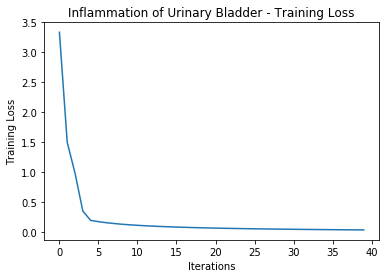

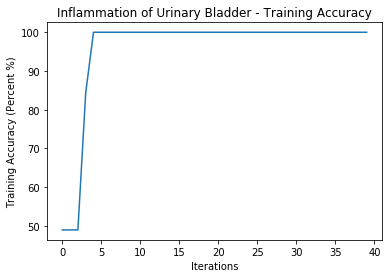


Testing Accuracy = 100.00%


In [7]:
model = train_model(diagnosis_title1, input, output1, test_input, test_output1)

iteration=0, loss=3.3663, train_acc=59.38%
iteration=500, loss=0.9542, train_acc=59.38%
iteration=1000, loss=0.8263, train_acc=59.38%
iteration=1500, loss=0.6700, train_acc=59.38%
iteration=2000, loss=0.3569, train_acc=76.04%
iteration=2500, loss=0.1960, train_acc=100.00%
iteration=3000, loss=0.1800, train_acc=100.00%
iteration=3500, loss=0.1668, train_acc=100.00%
iteration=4000, loss=0.1556, train_acc=100.00%
iteration=4500, loss=0.1460, train_acc=100.00%
iteration=5000, loss=0.1376, train_acc=100.00%
iteration=5500, loss=0.1302, train_acc=100.00%
iteration=6000, loss=0.1236, train_acc=100.00%
iteration=6500, loss=0.1177, train_acc=100.00%
iteration=7000, loss=0.1124, train_acc=100.00%
iteration=7500, loss=0.1076, train_acc=100.00%
iteration=8000, loss=0.1032, train_acc=100.00%
iteration=8500, loss=0.0991, train_acc=100.00%
iteration=9000, loss=0.0954, train_acc=100.00%
iteration=9500, loss=0.0920, train_acc=100.00%
iteration=10000, loss=0.0888, train_acc=100.00%
iteration=10500, loss

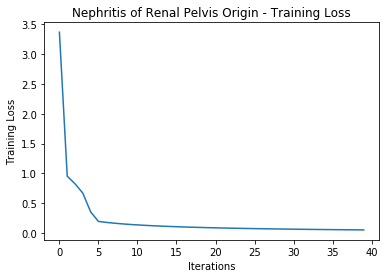

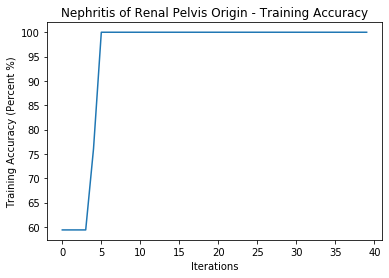


Testing Accuracy = 100.00%


In [8]:
model = train_model(diagnosis_title2, input, output2, test_input, test_output2)

# FEDERATED LEARNING WITH A TRUSTED AGGREGATOR

Now let's assume we have 4 hospitals. (The datasets will be split in 4, randomly.) And the 4 hospitals cannot share their cases because they are competitors. Hence, the ML model will be learned in a federated way by sending the model updates to a trusted aggregator that will average the model updates. The updated model will be sent back to each hospital in order to train the ML model in an iterative way. Only the ML model will be shared whereas the cases of each hospital will be kept private and will train model updates in a local way.<br>
<br>

<center>
 <img src="images/federated-learning.png">
 Federated Learning - Image taken from <a href="https://www.intel.ai/federated-learning-for-medical-imaging/">https://www.intel.ai/federated-learning-for-medical-imaging/</a>
</center>

In [9]:
import syft as sy
import torch as th
hook = sy.TorchHook(th)
from torch import nn, optim

n_hospitals = 4
hospitals = []
for i in range(n_hospitals):
    hospital_name = 'hospital{}'.format(i)
    hospital = sy.VirtualWorker(hook, id = hospital_name)
    hospitals.append(hospital)
secure_worker = sy.VirtualWorker(hook, id="secure_worker")

def get_workers_names(workers):
    return [worker.id for worker in workers]

def add_and_print_workers(worker, workers):
    print('workers of {} = {}'.format(worker.id, get_workers_names(workers)))
    worker.add_workers(workers)

for i in range(n_hospitals):
    workers = [hospitals[i2] for i2 in range(n_hospitals) if i2 != i] + [secure_worker]
    add_and_print_workers(hospitals[i], workers)
add_and_print_workers(secure_worker, hospitals)


W0819 21:45:56.401718 139962280290112 secure_random.py:26] Falling back to insecure randomness since the required custom op could not be found for the installed version of TensorFlow. Fix this by compiling custom ops. Missing file was '/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/tf_encrypted/operations/secure_random/secure_random_module_tf_1.14.0.so'
W0819 21:45:56.415213 139962280290112 deprecation_wrapper.py:119] From /home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/tf_encrypted/session.py:26: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0819 21:45:57.006902 139962280290112 base.py:628] Worker hospital1 already exists. Replacing old worker which could cause                     unexpected behavior
W0819 21:45:57.008156 139962280290112 base.py:628] Worker hospital2 already exists. Replacing old worker which could cause                     unexpected behavior
W0819 21:45:57.009157 139962280290112 base.py:628] 

workers of hospital0 = ['hospital1', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital1 = ['hospital0', 'hospital2', 'hospital3', 'secure_worker']
workers of hospital2 = ['hospital0', 'hospital1', 'hospital3', 'secure_worker']
workers of hospital3 = ['hospital0', 'hospital1', 'hospital2', 'secure_worker']
workers of secure_worker = ['hospital0', 'hospital1', 'hospital2', 'hospital3']


In [10]:
n_samples = train_data.shape[0]
samples_per_hospital = int((n_samples + 0.5) / n_hospitals)
hospital_features = []
hospital_targets1 = []
hospital_targets2 = []
train_data = th.tensor(train_data, dtype = torch.float32, requires_grad=True)
for i in range(n_hospitals):
    train_data2 = train_data[i * samples_per_hospital:(i + 1) * samples_per_hospital].clone().detach().requires_grad_(True)
    features = train_data2[:, :6].clone().detach().requires_grad_(True)
    targets1 = train_data2[:, 6][:, None].clone().detach() 
    targets2 = train_data2[:, 7][:, None].clone().detach() 
    hospital_features.append(features.send(hospitals[i]))
    hospital_targets1.append(targets1.send(hospitals[i]))
    hospital_targets2.append(targets2.send(hospitals[i]))

print(model)

LogisticRegression(
  (linear): Linear(in_features=6, out_features=1, bias=True)
)


In [11]:
def plot_federated_graphs(diagnosis_title, losses, accuracies):
    for i in range(n_hospitals):
        plt.plot(losses[i], label=f'Hospital {i}')
    legend = plt.legend(loc='upper right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Loss")
    plt.xlabel("Iterations")
    plt.ylabel("Training Loss")
    plt.show()
    for i in range(n_hospitals):
        plt.plot(accuracies[i], label=f'Hospital {i}')
    legend = plt.legend(loc='lower right', shadow=True)
    plt.title(f"{diagnosis_title} - Training Accuracy")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy (Percent %)")
    plt.show()
    
def compute_federated_accuracy(model, input, output):
    prediction = model(input)
    n_samples = prediction.shape[0]
    s = 0.
    for i in range(n_samples):
        p = 1. if prediction[i] >= 0.5 else 0.
        e = 1. if p == output[i] else 0.
        s += e
    return 100. * s / n_samples

iterations = 1000 #2000
worker_iterations = 5

def federated_learning(diagnosis_title, hospital_features, hospital_targets, test_input, test_output):
    model = LogisticRegression()
    criterion = torch.nn.BCELoss(size_average=True)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  
    losses = [[] for i in range(n_hospitals)]
    accuracies = [[] for i in range(n_hospitals)]
    for iteration in range(iterations):
        models = [model.copy().send(hospitals[i]) for i in range(n_hospitals)]
        optimizers = [torch.optim.SGD(params = models[i].parameters(), lr = learning_rate) for i in range(n_hospitals)]
        for worker_iteration in range(worker_iterations):
            last_losses = []
            for i in range(n_hospitals):
                optimizers[i].zero_grad()
                prediction = models[i](hospital_features[i])
                loss = criterion(prediction, hospital_targets[i])
                loss.backward()
                optimizers[i].step()
                loss = loss.get().data.item()
                last_losses.append(loss)
        for i in range(n_hospitals):
            losses[i].append(last_losses[i])
            train_acc = compute_federated_accuracy(models[i], hospital_features[i], hospital_targets[i])
            accuracies[i].append(train_acc)
            models[i].move(secure_worker)
        with th.no_grad():
            avg_weight = sum([models[i].linear.weight.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.weight.set_(avg_weight.get())
            avg_bias = sum([models[i].linear.bias.data for i in range(n_hospitals)]) / n_hospitals
            model.linear.bias.set_(avg_bias.get())
        if iteration % 100 == 0:
            losses_str = ['{:.4f}'.format(losses[i][-1]) for i in range(n_hospitals)]
            accuracies_str = [to_percent(accuracies[i][-1]) for i in range(n_hospitals)]
            print('Iteration={}, losses={}, accuracies={}'.format(iteration, losses_str, accuracies_str))
    plot_federated_graphs(diagnosis_title, losses, accuracies)
    test_acc = compute_accuracy(model, test_input, test_output)
    print('\nTesting Accuracy = {}'.format(to_percent(test_acc)))
    return model


/home/jckuri/.conda/envs/private_pytorch/lib/python3.7/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Iteration=0, losses=['1.9065', '1.8629', '0.7269', '1.2242'], accuracies=['50.00%', '50.00%', '62.50%', '58.33%']
Iteration=100, losses=['1.4007', '1.3144', '0.8521', '1.2932'], accuracies=['50.00%', '50.00%', '62.50%', '41.67%']
Iteration=200, losses=['0.9029', '0.7439', '0.4928', '0.9897'], accuracies=['50.00%', '62.50%', '62.50%', '54.17%']
Iteration=300, losses=['0.3542', '0.2369', '0.3083', '0.4075'], accuracies=['79.17%', '95.83%', '79.17%', '66.67%']
Iteration=400, losses=['0.1917', '0.1684', '0.2015', '0.1913'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=500, losses=['0.1715', '0.1508', '0.1762', '0.1688'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=600, losses=['0.1555', '0.1369', '0.1582', '0.1533'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1425', '0.1256', '0.1441', '0.1415'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1316', '0.1162', '0.1327', '0.13

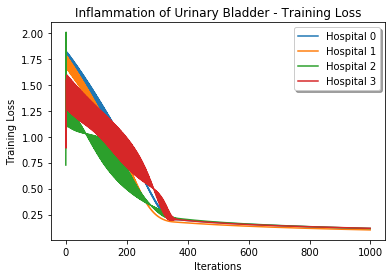

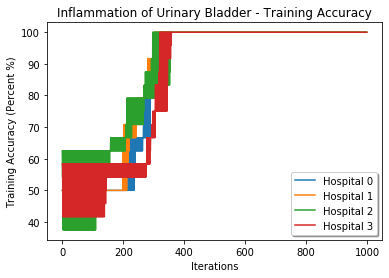


Testing Accuracy = 100.00%


In [12]:
model = federated_learning(diagnosis_title1, hospital_features, hospital_targets1, test_input, test_output1)

Iteration=0, losses=['1.1392', '1.8747', '0.8488', '1.7840'], accuracies=['41.67%', '37.50%', '58.33%', '41.67%']
Iteration=100, losses=['1.0802', '0.4893', '1.0590', '1.1285'], accuracies=['83.33%', '66.67%', '58.33%', '41.67%']
Iteration=200, losses=['0.3641', '0.5924', '0.9173', '1.1094'], accuracies=['83.33%', '66.67%', '58.33%', '41.67%']
Iteration=300, losses=['0.3209', '0.4818', '0.8035', '0.9117'], accuracies=['75.00%', '66.67%', '58.33%', '58.33%']
Iteration=400, losses=['0.2540', '0.3264', '0.6644', '0.3510'], accuracies=['79.17%', '79.17%', '58.33%', '91.67%']
Iteration=500, losses=['0.1833', '0.2052', '0.2130', '0.2052'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=600, losses=['0.1670', '0.1868', '0.1944', '0.1882'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=700, losses=['0.1538', '0.1727', '0.1795', '0.1745'], accuracies=['100.00%', '100.00%', '100.00%', '100.00%']
Iteration=800, losses=['0.1427', '0.1610', '0.1669', '0.1635']

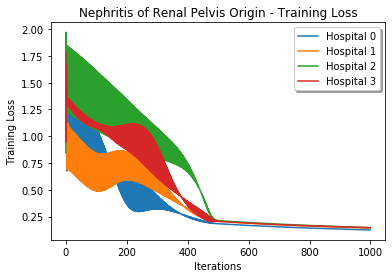

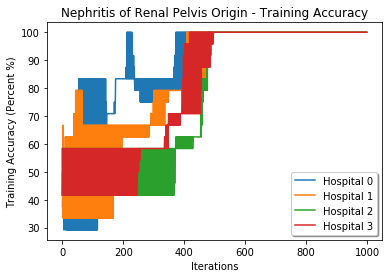


Testing Accuracy = 100.00%


In [13]:
model = federated_learning(diagnosis_title2, hospital_features, hospital_targets2, test_input, test_output2)